In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather = pd.read_csv('weather_hourly_agg.csv', parse_dates=['DATE'])
traffic = pd.read_csv('traffic_hourly_agg.csv', parse_dates=['DATE'])

In [3]:
weather.columns = [c.lower() for c in weather.columns]

In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10527 entries, 0 to 10526
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   average_felt_temperature  10527 non-null  float64       
 1   average_road_temperature  10527 non-null  float64       
 2   minimum_felt_temperature  10527 non-null  float64       
 3   date                      10527 non-null  datetime64[ns]
 4   minimum_precipitation     10527 non-null  float64       
 5   maximum_humidity          10527 non-null  float64       
 6   maximum_felt_temperature  10527 non-null  float64       
 7   maximum_precipitation     10527 non-null  float64       
 8   maximum_temperature       10527 non-null  float64       
 9   average_humidity          10527 non-null  float64       
 10  average_wind              10527 non-null  float64       
 11  average_directionofwind   10527 non-null  float64       
 12  minimum_temperatur

In [5]:
traffic.columns = [c.lower() for c in traffic.columns]
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11523 entries, 0 to 11522
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   max_number_of_vehicles  11523 non-null  int64         
 1   minimum_speed           11523 non-null  int64         
 2   min_number_of_vehicles  11523 non-null  int64         
 3   average_speed           11523 non-null  float64       
 4   avg_number_of_vehicles  11523 non-null  float64       
 5   maximum_speed           11523 non-null  int64         
 6   date                    11523 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 630.3 KB


In [6]:
df = pd.merge(traffic, weather, how='inner', on='date').sort_values('date')
df

,max_number_of_vehicles,minimum_speed,min_number_of_vehicles,average_speed,avg_number_of_vehicles,maximum_speed,date,average_felt_temperature,average_road_temperature,minimum_felt_temperature,...,minimum_temperature,average_temperature,maximum_road_temperature,minimum_humidity,minimum_directionofwind,minimum_wind,maximum_directionofwind,minimum_road_temperature,maximum_wind,average_precipitation
0,298,6,11,56.59,58.72,193,2020-01-01 00:00:00,4.00,3.79,-4.22,...,-0.55,4.40,8.0,59.52,0.0,0.0,355.0,-13.2,6.41,1.18
1,272,6,11,57.41,53.68,188,2020-01-01 01:00:00,3.95,3.34,-3.75,...,-0.41,4.36,7.4,57.21,1.0,0.0,354.0,-37.1,6.00,0.23
2,223,3,11,59.70,44.72,197,2020-01-01 02:00:00,4.11,4.08,-1.24,...,1.15,4.38,7.2,52.10,0.0,0.0,355.0,1.8,5.39,0.93
3,166,6,11,61.05,37.51,191,2020-01-01 03:00:00,4.26,4.23,0.39,...,2.12,4.36,6.6,54.88,0.0,0.0,355.0,2.7,5.01,0.62
4,113,6,11,62.44,32.87,207,2020-01-01 04:00:00,4.92,4.56,0.58,...,2.34,4.65,6.7,56.46,0.0,0.0,355.0,2.9,3.97,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10318,780,1,11,49.27,107.00,202,2021-04-28 13:00:00,17.57,22.08,10.96,...,12.08,17.01,40.3,0.88,1.0,0.0,355.0,-1.9,7.65,0.88
10319,637,1,11,48.46,88.08,195,2021-04-28 14:00:00,16.78,20.58,11.15,...,11.17,16.28,36.3,0.88,0.0,0.0,356.0,-1.9,7.49,2.57
10320,552,1,11,48.28,83.62,200,2021-04-28 15:00:00,15.42,18.33,9.38,...,10.36,15.11,31.6,0.88,0.0,0.0,355.0,-1.9,8.05,2.48
10321,522,1,11,47.41,74.22,197,2021-04-28 16:00:00,14.49,16.71,7.96,...,9.69,14.27,27.2,0.88,0.0,0.0,355.0,-1.9,10.37,2.49


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
max_number_of_vehicles,10323.0,564.932481,318.729129,11.00,270.000,533.00,857.000,1351.00
minimum_speed,10323.0,3.312990,2.257879,0.00,1.000,3.00,6.000,38.00
min_number_of_vehicles,10323.0,11.000000,0.000000,11.00,11.000,11.00,11.000,11.00
average_speed,10323.0,57.749718,5.323657,32.22,53.590,57.06,60.815,77.42
avg_number_of_vehicles,10323.0,82.577765,34.298380,11.00,50.320,85.43,111.710,167.80
maximum_speed,10323.0,195.445607,15.679680,84.00,186.000,195.00,204.000,255.00
average_felt_temperature,10323.0,14.083199,8.268232,-5.48,7.380,12.94,21.410,33.79
average_road_temperature,10323.0,17.588540,11.100819,-26.18,9.100,14.61,24.890,53.45
minimum_felt_temperature,10323.0,8.992021,8.518939,-13.47,2.450,7.93,16.225,27.65
minimum_precipitation,10323.0,0.000068,0.004017,0.00,0.000,0.00,0.000,0.34


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='date'>

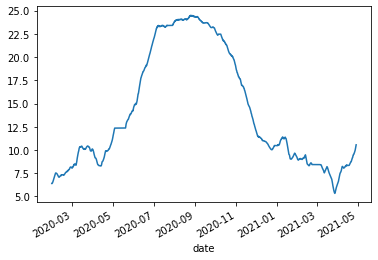

In [9]:
#Observe monthly trend
df.set_index('date')['average_temperature'].rolling(24*30).mean().plot()

<AxesSubplot:xlabel='date'>

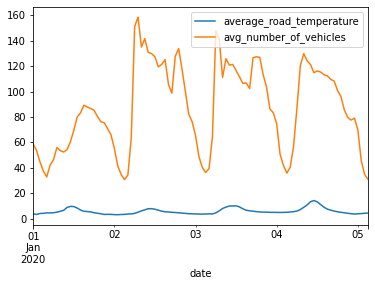

In [10]:
df.set_index('date')[:100][['average_road_temperature', 'avg_number_of_vehicles']].plot()

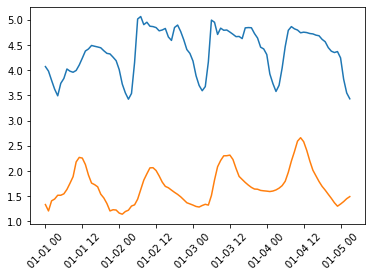

In [11]:
plt.plot(np.log(df.set_index('date')[:100]['avg_number_of_vehicles']))
plt.plot(np.log(df.set_index('date')[:100]['average_road_temperature']))
plt.xticks(rotation=45)
plt.show()

In [12]:
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour

<AxesSubplot:xlabel='hour'>

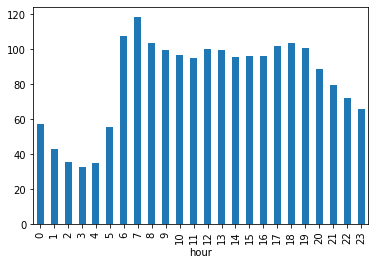

In [13]:
df.groupby('hour').avg_number_of_vehicles.mean().plot(kind='bar')

<AxesSubplot:xlabel='dayofweek'>

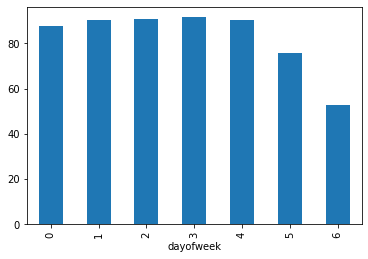

In [18]:
df.groupby('dayofweek').avg_number_of_vehicles.mean().plot(kind='bar')

In [19]:
df.groupby(['dayofweek','hour']).avg_number_of_vehicles.mean()

dayofweek  hour
0          0       51.543226
           1       41.520968
           2       35.451452
           3       32.311935
           4       35.250000
                     ...    
6          19      60.421587
           20      58.346667
           21      61.922742
           22      60.218871
           23      58.974667
Name: avg_number_of_vehicles, Length: 168, dtype: float64

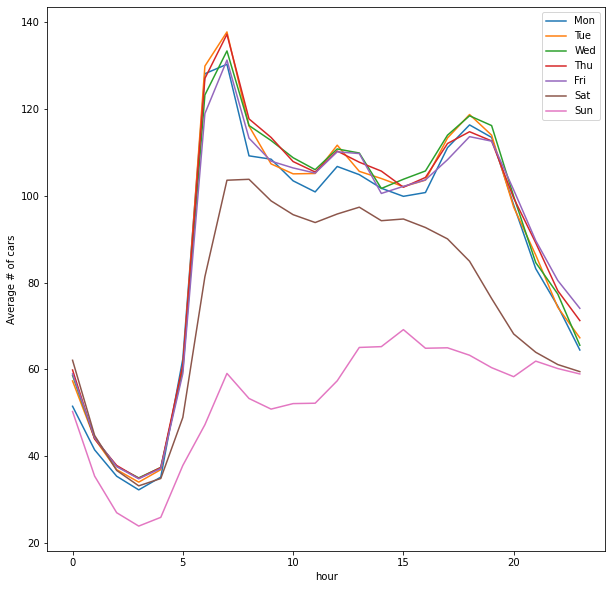

In [20]:
plt.figure(figsize=(10,10))
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i, dayname in enumerate(days):
    df.groupby(['dayofweek','hour']).avg_number_of_vehicles.mean()[i].plot(label=dayname)
plt.ylabel('Average # of cars')
plt.legend()
plt.show();

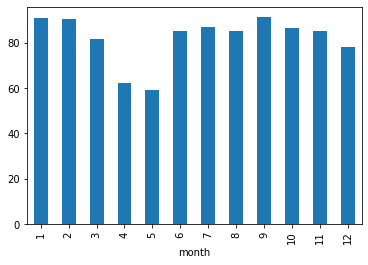

In [21]:
df.query('date < 2021').groupby('month').avg_number_of_vehicles.mean().plot(kind='bar')
plt.show()

### Time Series Prediction

In [22]:
df.columns

Index(['max_number_of_vehicles', 'minimum_speed', 'min_number_of_vehicles',
       'average_speed', 'avg_number_of_vehicles', 'maximum_speed', 'date',
       'average_felt_temperature', 'average_road_temperature',
       'minimum_felt_temperature', 'minimum_precipitation', 'maximum_humidity',
       'maximum_felt_temperature', 'maximum_precipitation',
       'maximum_temperature', 'average_humidity', 'average_wind',
       'average_directionofwind', 'minimum_temperature', 'average_temperature',
       'maximum_road_temperature', 'minimum_humidity',
       'minimum_directionofwind', 'minimum_wind', 'maximum_directionofwind',
       'minimum_road_temperature', 'maximum_wind', 'average_precipitation',
       'month', 'dayofweek', 'hour'],
      dtype='object')

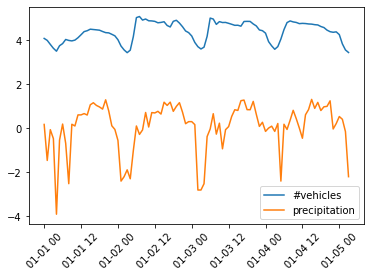

In [24]:
plt.plot(np.log(df.set_index('date')[:100]['avg_number_of_vehicles']))
plt.plot(np.log(df.set_index('date')[:100]['average_precipitation']))
plt.xticks(rotation=45)
plt.legend(['#vehicles','precipitation'])
plt.show()

In [25]:
ts = df.set_index('date').copy()
ts.interpolate(inplace=True)

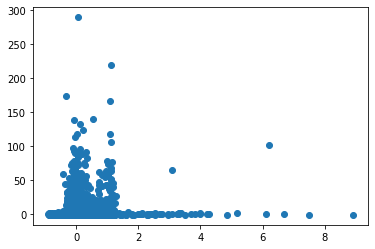

In [26]:
num_veh_change = ts['avg_number_of_vehicles'].pct_change()
avg_precip = ts['average_precipitation'].pct_change()
num_veh_change.shape, avg_precip.shape
plt.scatter(num_veh_change, avg_precip);

# MULTIVARIATE TIME SERIES ANALYSIS

* https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
* p --> Order of AR (autoregressive term) -number of lags to be used as predictors for regression
* q --> Order of MA (moving average term) -
* d --> Order of Differencing (to make the series stationary)

### Check if Stationary

* Mean and variance seems to change over time

In [63]:
veh.diff()

,avg_number_of_vehicles,average_temperature,average_precipitation
date,,,
2020-01-01,NaN,NaN,NaN
2020-01-02,37.489583,-0.601667,0.020833
2020-01-03,-2.852500,0.376250,-0.042083
2020-01-04,-7.575417,1.015417,0.191250
2020-01-05,-25.187917,-0.665833,-0.212083
...,...,...,...
2020-03-27,-0.890000,0.697500,-0.074167
2020-03-28,-20.269583,-0.302083,0.175833
2020-03-29,-24.356667,0.616667,0.106250


In [62]:
np.log(veh).corr()

,avg_number_of_vehicles,average_temperature,average_precipitation
avg_number_of_vehicles,1.000000,-0.047021,0.088618
average_temperature,-0.047021,1.000000,0.199592
average_precipitation,0.088618,0.199592,1.000000


In [29]:
veh = df[['date', 'avg_number_of_vehicles', 'average_temperature', 'average_precipitation']].set_index('date').loc['2020-01':'2020-03']

In [30]:
veh = veh.resample(rule='D').mean()

In [31]:
veh.shape

(91, 3)

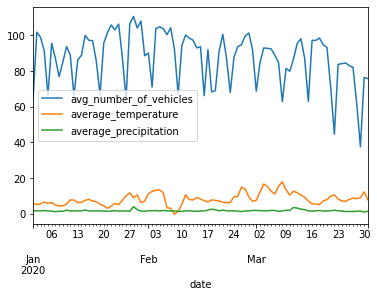

In [32]:
veh.plot();

In [33]:
full_range = set(pd.date_range('2020-01-01', '2020-03-31', freq='D'))
veh_dates = set(veh.index.tolist())
missing_days = full_range.difference(veh_dates)
missing_days = pd.Series(list(missing_days)).sort_values().reset_index(drop=True)
missing_days.values

C:\Users\TCLSOY~1\AppData\Local\Temp/ipykernel_8616/527042540.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  missing_days = pd.Series(list(missing_days)).sort_values().reset_index(drop=True)


array([], dtype=float64)

In [34]:
veh.iloc[int(len(veh)*0.95)]

avg_number_of_vehicles    82.140417
average_temperature        8.667083
average_precipitation      1.134583
Name: 2020-03-27 00:00:00, dtype: float64

In [35]:
X = veh.loc['2020-01-01':'2020-03-27']
y = veh.loc['2020-03-27':]

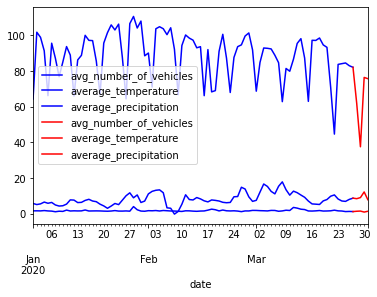

In [36]:
ax = X.plot(c='b')
y.plot(c='r', ax=ax)
plt.title
plt.show()

In [41]:
#Test if stationary (Coint Johansen test) - h0: Time series data is not stationary
from statsmodels.tsa.vector_ar.vecm import coint_johansen
for col in veh.columns:
    res = coint_johansen(veh.drop(col,axis=1), -1 ,1).eig
    print(res)
print(coint_johansen(veh, -1 ,1).eig)

[0.22398488 0.00969704]
[0.24329631 0.0071311 ]
[0.19101089 0.00547855]
[0.26049158 0.20266618 0.00542291]


In [43]:
from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(endog=X)
model = model.fit()

In [52]:
help(model)

Help on VARResultsWrapper in module statsmodels.tsa.vector_ar.var_model:

<statsmodels.tsa.vector_ar.var_model.VARResultsWrapper object>
    Estimate VAR(p) process with fixed number of lags
    
    Parameters
    ----------
    endog : ndarray
    endog_lagged : ndarray
    params : ndarray
    sigma_u : ndarray
    lag_order : int
    model : VAR model instance
    trend : str {'n', 'c', 'ct'}
    names : array_like
        List of names of the endogenous variables in order of appearance in
        `endog`.
    dates
    exog : ndarray
    
    Attributes
    ----------
    params : ndarray (p x K x K)
        Estimated A_i matrices, A_i = coefs[i-1]
    dates
    endog
    endog_lagged
    k_ar : int
        Order of VAR process
    k_trend : int
    model
    names
    neqs : int
        Number of variables (equations)
    nobs : int
    n_totobs : int
    params : ndarray (Kp + 1) x K
        A_i matrices and intercept in stacked form [int A_1 ... A_p]
    names : list
        va

In [51]:
prediction = model.forecast(y.values, steps=len(y))
print(prediction)

[[85.52263575  8.18480194  1.47919849]
 [88.14189366  8.29311994  1.56660402]
 [88.86363185  8.31523498  1.60511286]
 [89.06873293  8.31306738  1.62098434]
 [89.12844602  8.30509794  1.6271326 ]]


In [53]:
prediction[:,0]

array([85.52263575, 88.14189366, 88.86363185, 89.06873293, 89.12844602])

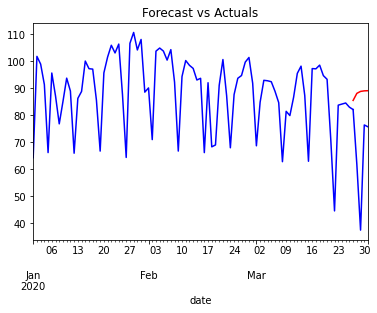

In [59]:
ax = X['avg_number_of_vehicles'].plot(c='b')
y['avg_number_of_vehicles'].plot(c='b', ax=ax)
pd.Series(prediction[:,0], index=y.index).plot(c='r', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()

In [139]:
forecast = model.get_forecast(len(y))
fc = forecast.predicted_mean
conf = forecast.conf_int(alpha=0.05)

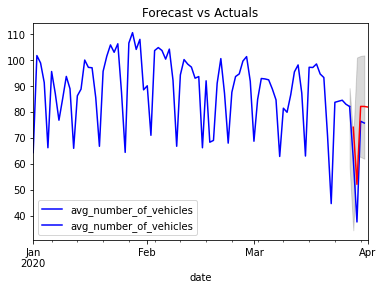

In [140]:
ax = X.plot(c='b')
y.plot(c='b', ax=ax)
fc.plot(c='r', ax=ax)
plt.fill_between(y.index, conf.iloc[:,0], conf.iloc[:,1], 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.show()

In [141]:
fc

2020-03-28    74.121846
2020-03-29    52.074173
2020-03-30    82.180061
2020-03-31    82.166200
2020-04-01    81.927681
Freq: D, Name: predicted_mean, dtype: float64

## DECOMPOSITION

In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [144]:
results = seasonal_decompose(X,period=30)

<Figure size 500x500 with 0 Axes>

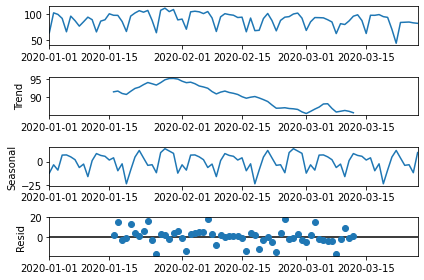

In [145]:
plt.figure(figsize=(100,100), dpi=5)
results.plot();

In [146]:
y.values

array([[82.14041667],
       [61.87083333],
       [37.51416667],
       [76.44333333],
       [75.75125   ]])

https://app.datacamp.com/learn/courses/time-series-analysis-in-python

In [147]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                  # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, y.iloc[:,0].values)

C:\Users\TCLSOY~1\AppData\Local\Temp/ipykernel_17492/937722734.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
C:\Users\TCLSOY~1\AppData\Local\Temp/ipykernel_17492/937722734.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],


{'mape': 0.32060027927931306,
 'me': 7.7499920990083435,
 'mae': 14.876084638099602,
 'mpe': 0.2182159535333504,
 'rmse': 21.10077557139902,
 'acf1': -0.22987069156919296,
 'corr': 0.021666520631034667,
 'minmax': 0.18890241336606517}

### Auto Selection of ARIMA components 

In [148]:
import pmdarima as pm

In [155]:
automodel = pm.auto_arima(X, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=7,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   
                      start_P=0,  start_Q=0,
                      max_P=3, max_Q=3,
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(automodel.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=700.496, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=639.716, Time=0.18 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=666.729, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=1031.386, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=696.543, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=663.533, Time=0.61 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=648.011, Time=0.23 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=667.341, Time=0.10 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=656.670, Time=0.12 sec
 ARIMA(2,0,0)(1,0,0)[7] intercept   : AIC=641.890, Time=0.26 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=649.951, Time=0.24 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=640.932, Time=0.15 sec
 ARIMA(2,0,1)(1,0,0)[7] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,0)(1,0,0)[7]             : AIC=inf, Time=0.